In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")

import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Mental%20Health%20in%20Tech%20Survey/survey.csv")

In [4]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

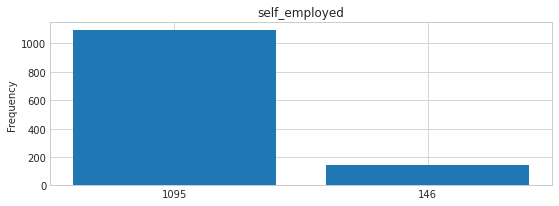

self_employed:
No     1095
Yes     146
Name: self_employed, dtype: int64


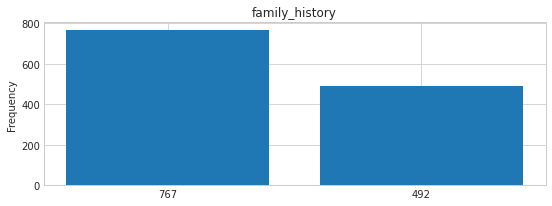

family_history:
No     767
Yes    492
Name: family_history, dtype: int64


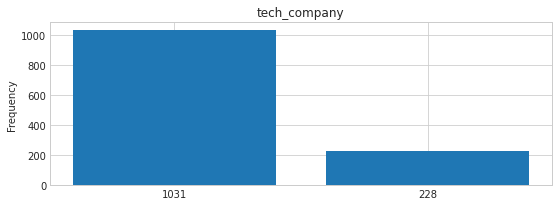

tech_company:
Yes    1031
No      228
Name: tech_company, dtype: int64


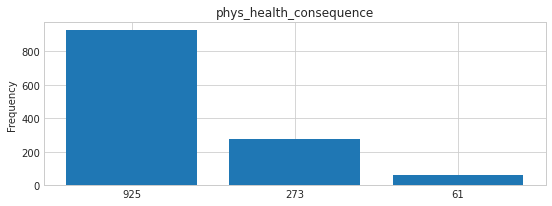

phys_health_consequence:
No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64


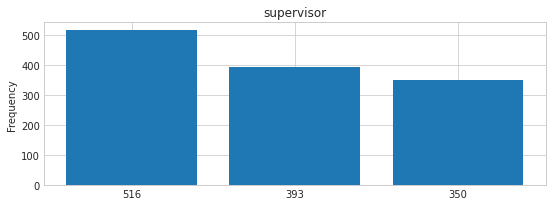

supervisor:
Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64


In [6]:
def bar_plot(categ_var):
    """
        input: variable ex: "anonymity"
        output: bar plot & value count
    """
    var = df[categ_var]
    var_value = var.value_counts()
    
    plt.figure(figsize = (9,3))
    plt.bar(var_value.index, var_value)
    plt.xticks(var_value.index, var_value.values)
    plt.ylabel("Frequency")
    plt.title(categ_var)
    plt.show()
    print(f"{categ_var}:\n{var_value}")
categorical_vars = ["self_employed","family_history","tech_company","phys_health_consequence","supervisor"]
for c in categorical_vars:
    bar_plot(c)

<AxesSubplot:>

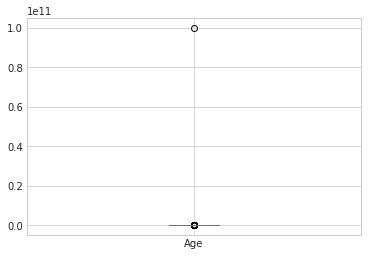

In [7]:
df.boxplot(column = "Age")

In [8]:
Q1 = np.percentile(df["Age"],25)
Q3 = np.percentile(df["Age"],75)
IQR = Q3 - Q1
outlier_step = IQR * 1.5
outlier_df = df[(df["Age"] < Q1 - outlier_step) | (df["Age"] > Q3 + outlier_step)]
outlier_df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
38,2014-08-27 11:42:08,50,M,United States,IN,No,No,No,NaN,100-500,...,Don't know,No,No,Some of them,Yes,No,Maybe,Don't know,No,NaN
143,2014-08-27 12:39:14,-29,Male,United States,MN,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,No,No,Don't know,No,NaN
294,2014-08-27 14:15:57,56,Male,United States,NaN,No,No,Yes,Never,More than 1000,...,Don't know,No,Maybe,Yes,Some of them,No,Maybe,Don't know,No,NaN
297,2014-08-27 14:18:41,60,male,United States,CA,No,No,No,NaN,More than 1000,...,Don't know,No,No,Some of them,Yes,Maybe,Maybe,Yes,No,NaN
347,2014-08-27 14:45:45,54,M,United States,CA,No,Yes,Yes,Never,More than 1000,...,Don't know,No,No,No,Yes,No,No,Don't know,No,NaN


In [9]:
df = df.drop(outlier_df.index, axis = 0).reset_index(drop = True)
df

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1214,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1215,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1216,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1217,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


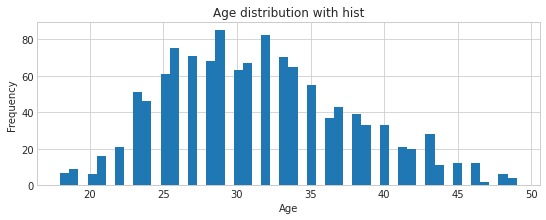

In [10]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()
plot_hist("Age")

In [11]:
df.columns[df.isnull().any()]

Index(['state', 'self_employed', 'work_interfere', 'comments'], dtype='object')

In [12]:
print("Missing values for state: {}".format(df["state"].isnull().sum()))
print("Missing values for work interfere: {}".format(df["work_interfere"].isnull().sum()))
print("Missing values for self employment: {}".format(df["self_employed"].isnull().sum()))
print("Missing values for comments: {}".format(df["comments"].isnull().sum()))

Missing values for state: 504
Missing values for work interfere: 257
Missing values for self employment: 18
Missing values for comments: 1062


In [13]:
df[df["self_employed"].isnull()]

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [14]:
df["self_employed"] = df["self_employed"].fillna("No")
df["self_employed"].isnull().any()

False

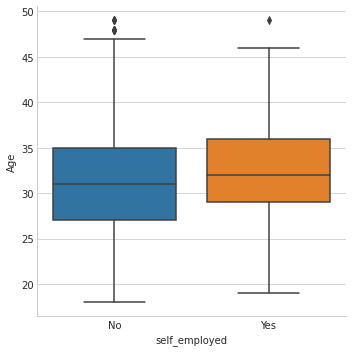

In [15]:
sns.factorplot(x = "self_employed", y = "Age", data = df, kind="box")
plt.show()

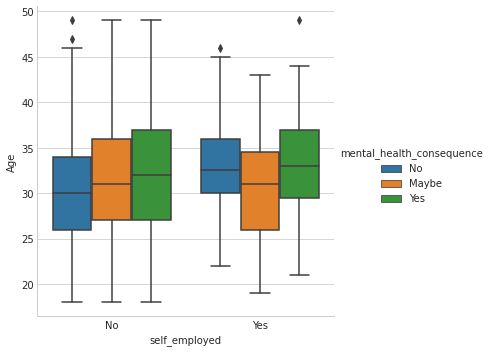

In [16]:
sns.factorplot(x = "self_employed", y = "Age", hue = "mental_health_consequence", data = df, kind="box")
plt.show()

In [17]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

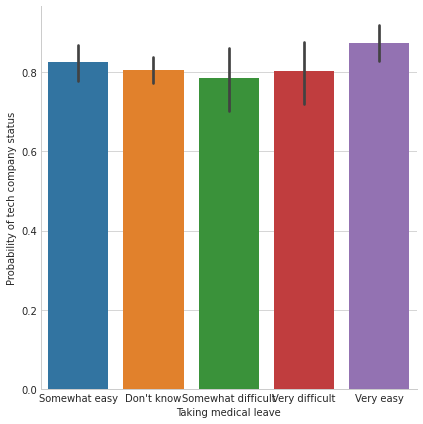

In [18]:
df['tech_company'][df["tech_company"] == "Yes"] = 1
df["tech_company"][df["tech_company"] == "No"] = 0
g = sns.factorplot(x = "leave", y = "tech_company", data = df, kind = "bar", size = 6)
g.set_ylabels("Probability of tech company status")
g.set_xlabels("Taking medical leave")
plt.show()

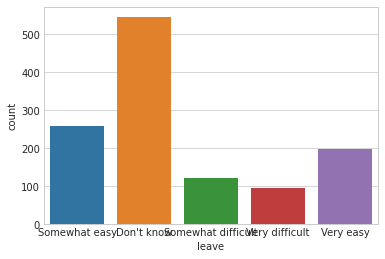

In [19]:
ax = sns.countplot(x="leave", data=df)

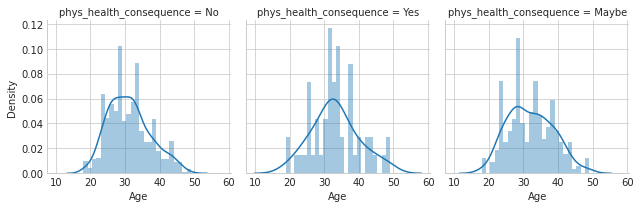

In [20]:
g = sns.FacetGrid(df, col = "phys_health_consequence")
g.map(sns.distplot, "Age", bins = 25)
plt.show()